In [140]:
import pandas as pd

In [141]:
customers = pd.read_csv('customers.csv')
customers

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


In [142]:
customers.groupby('state').count()

,id,name,segment,city
state,,,,
Alabama,9,9,9,9
Arizona,21,21,21,21
Arkansas,2,2,2,2
California,161,161,161,161
Colorado,20,20,20,20
Connecticut,7,7,7,7
Delaware,6,6,6,6
District of Columbia,1,1,1,1
Florida,24,24,24,24


In [143]:
orders = pd.read_csv('orders.csv')
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [144]:
orders.drop_duplicates(inplace = True)
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [145]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5009 non-null   int64  
 1   order_date   5009 non-null   object 
 2   ship_mode    5009 non-null   object 
 3   customer_id  5009 non-null   object 
 4   sales        5009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 234.8+ KB


In [146]:
orders[orders['sales'] == 0 ]

,id,order_date,ship_mode,customer_id,sales


In [147]:
sum(orders.order_date.notnull())

5009

In [148]:
sum(orders.customer_id.notnull())

5009

In [149]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [150]:
orders['Y-m_date'] = orders['order_date'].dt.strftime('%Y-%m')

In [151]:
orders['Y_date'] = orders['order_date'].dt.strftime('%Y')

In [152]:
r = pd.to_datetime(pd.date_range(start='2014-01-01', end='2018-01-01', freq = 'M'))
r1 = pd.DataFrame(r)
r2 = pd.DataFrame(r)

r1['cohort'] = r1[0].dt.strftime('%Y-%m')
r2['Y-m_date'] = r2[0].dt.strftime('%Y-%m')
r1['total_ord'] = 0
r2['total_ord'] = 0

r1.drop(columns = 0, inplace = True)
r2.drop(columns = 0, inplace = True)

In [153]:
r = r1.merge(r2, left_on = 'total_ord', right_on = 'total_ord')
r = r[r['Y-m_date'] >= r['cohort']]
r.set_index(['cohort', 'Y-m_date'],inplace = True)
r

total_ord
cohort  Y-m_date           
2014-01 2014-01           0
        2014-02           0
        2014-03           0
        2014-04           0
        2014-05           0
...                     ...
2017-10 2017-11           0
        2017-12           0
2017-11 2017-11           0
        2017-12           0
2017-12 2017-12           0

[1176 rows x 1 columns]

In [154]:
orders

,id,order_date,ship_mode,customer_id,sales,Y-m_date,Y_date
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07,2014
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03,2014
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01,2014
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04,2014
...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,2017-11,2017
5005,169320,2017-07-23,Second,LH-16900,171.430,2017-07,2017
5006,169488,2017-09-07,First,AA-10375,56.860,2017-09,2017
5007,169502,2017-08-28,Standard,MG-17650,113.410,2017-08,2017


In [155]:
orders.groupby('Y-m_date').count().head(2)

,id,order_date,ship_mode,customer_id,sales,Y_date
Y-m_date,,,,,,
2014-01,32,32,32,32,32,32
2014-02,28,28,28,28,28,28


In [156]:
cohorts = orders.groupby('customer_id',as_index=False)['Y-m_date'].min().rename(columns = {'Y-m_date' : 'cohort'})
cohorts.sort_values('cohort')

,customer_id,cohort
396,JO-15145,2014-01
558,ND-18370,2014-01
545,MV-18190,2014-01
544,MV-17485,2014-01
540,MS-17830,2014-01
...,...,...
345,JC-15385,2017-07
742,TC-21145,2017-09
593,PH-18790,2017-10
403,JR-15700,2017-10


In [157]:
orders = pd.merge(orders, cohorts, left_on = 'customer_id', right_on = 'customer_id')

In [158]:
orders['cohort_year'] = pd.to_datetime(orders['cohort']).dt.strftime('%Y')

In [159]:
orders

,id,order_date,ship_mode,customer_id,sales,Y-m_date,Y_date,cohort,cohort_year
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09,2014,2014-09,2014
1,131884,2015-12-06,Same Day,DK-13375,594.002,2015-12,2015,2014-09,2014
2,145065,2015-12-12,First,DK-13375,32.308,2015-12,2015,2014-09,2014
3,133046,2017-07-27,Second,DK-13375,297.990,2017-07,2017,2014-09,2014
4,165099,2017-12-11,First,DK-13375,1.392,2017-12,2017,2014-09,2014
...,...,...,...,...,...,...,...,...,...
5004,168193,2017-03-06,Second,RM-19750,98.350,2017-03,2017,2017-03,2017
5005,122140,2015-04-02,Standard,MO-17950,130.288,2015-04,2015,2015-04,2015
5006,166233,2017-07-03,Standard,MO-17950,24.000,2017-07,2017,2015-04,2015
5007,160150,2015-07-19,First,TS-21085,2.025,2015-07,2015,2015-07,2015


In [160]:
orders.groupby(['cohort_year', 'customer_id', ]).count()

id  order_date  ship_mode  sales  Y-m_date  Y_date  \
cohort_year customer_id                                                       
2014        AA-10315      5           5          5      5         5       5   
            AA-10375      9           9          9      9         9       9   
            AA-10480      4           4          4      4         4       4   
            AA-10645      6           6          6      6         6       6   
            AB-10015      3           3          3      3         3       3   
...                      ..         ...        ...    ...       ...     ...   
2017        ML-18040      3           3          3      3         3       3   
            PH-18790      1           1          1      1         1       1   
            RM-19750      1           1          1      1         1       1   
            TC-21145      1           1          1      1         1       1   
            TM-21490      3           3          3      3         3       3   

                         cohort  
cohort_year customer_id          
2014        AA-10315          5  
            AA-10375          9  
            AA-10480          4  
            AA-10645          6  
            AB-10015          3  
...                         ...  
2017        ML-18040          3  
            PH-18790          1  
            RM-19750          1  
            TC-21145          1  
            TM-21490          3  

[793 rows x 7 columns]

In [161]:
r.join(orders.groupby(['cohort', 'Y-m_date']).agg({'customer_id': pd.Series.nunique}).rename(columns={'customer_id': 'TotalUsers'})).fillna(0)

total_ord  TotalUsers
cohort  Y-m_date                       
2014-01 2014-01           0        32.0
        2014-02           0         3.0
        2014-03           0         0.0
        2014-04           0         2.0
        2014-05           0         2.0
...                     ...         ...
2017-10 2017-11           0         0.0
        2017-12           0         0.0
2017-11 2017-11           0         1.0
        2017-12           0         0.0
2017-12 2017-12           0         0.0

[1176 rows x 2 columns]

In [162]:
real_0 = r.join(orders.groupby(['cohort', 'Y-m_date']).agg({'customer_id': pd.Series.nunique}).rename(columns={'customer_id': 'TotalUsers'})).fillna(0)

In [163]:
real_0

total_ord  TotalUsers
cohort  Y-m_date                       
2014-01 2014-01           0        32.0
        2014-02           0         3.0
        2014-03           0         0.0
        2014-04           0         2.0
        2014-05           0         2.0
...                     ...         ...
2017-10 2017-11           0         0.0
        2017-12           0         0.0
2017-11 2017-11           0         1.0
        2017-12           0         0.0
2017-12 2017-12           0         0.0

[1176 rows x 2 columns]

In [164]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [165]:
u1 = real_0.groupby(level=0).apply(cohort_period).reset_index()

In [166]:
u1

,cohort,Y-m_date,total_ord,TotalUsers,CohortPeriod
0,2014-01,2014-01,0,32.0,0
1,2014-01,2014-02,0,3.0,1
2,2014-01,2014-03,0,0.0,2
3,2014-01,2014-04,0,2.0,3
4,2014-01,2014-05,0,2.0,4
...,...,...,...,...,...
1171,2017-10,2017-11,0,0.0,1
1172,2017-10,2017-12,0,0.0,2
1173,2017-11,2017-11,0,1.0,0
1174,2017-11,2017-12,0,0.0,1


In [167]:
u2 = u1.set_index(['cohort', 'CohortPeriod'])
u2

Y-m_date  total_ord  TotalUsers
cohort  CohortPeriod                                
2014-01 0             2014-01          0        32.0
        1             2014-02          0         3.0
        2             2014-03          0         0.0
        3             2014-04          0         2.0
        4             2014-05          0         2.0
...                       ...        ...         ...
2017-10 1             2017-11          0         0.0
        2             2017-12          0         0.0
2017-11 0             2017-11          0         1.0
        1             2017-12          0         0.0
2017-12 0             2017-12          0         0.0

[1176 rows x 3 columns]

In [168]:
cohort_group_size = u2['TotalUsers'].groupby(level=0).first()

In [169]:
user_retention = u2['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
cohort,,,,,,,,,,,,,,,,,,,,,
2014-01,1.0,0.093750,0.000000,0.062500,0.062500,0.000000,0.062500,0.125000,0.156250,0.093750,...,0.187500,0.125000,0.156250,0.125000,0.031250,0.062500,0.281250,0.281250,0.3125,0.1875
2014-02,1.0,0.166667,0.083333,0.041667,0.000000,0.083333,0.083333,0.125000,0.125000,0.166667,...,0.083333,0.083333,0.208333,0.125000,0.125000,0.166667,0.250000,0.250000,0.1250,NaN
2014-03,1.0,0.061538,0.030769,0.123077,0.107692,0.000000,0.107692,0.076923,0.123077,0.092308,...,0.200000,0.153846,0.184615,0.092308,0.292308,0.123077,0.276923,0.246154,NaN,NaN
2014-04,1.0,0.107143,0.035714,0.071429,0.053571,0.142857,0.107143,0.160714,0.142857,0.017857,...,0.089286,0.125000,0.142857,0.267857,0.142857,0.250000,0.250000,NaN,NaN,NaN
2014-05,1.0,0.089286,0.089286,0.071429,0.178571,0.035714,0.214286,0.178571,0.071429,0.053571,...,0.125000,0.107143,0.285714,0.125000,0.303571,0.160714,NaN,NaN,NaN,NaN
2014-06,1.0,0.020833,0.041667,0.083333,0.041667,0.187500,0.166667,0.020833,0.083333,0.125000,...,0.062500,0.270833,0.145833,0.291667,0.229167,NaN,NaN,NaN,NaN,NaN
2014-07,1.0,0.136364,0.113636,0.000000,0.113636,0.181818,0.045455,0.000000,0.181818,0.045455,...,0.250000,0.227273,0.295455,0.204545,NaN,NaN,NaN,NaN,NaN,NaN
2014-08,1.0,0.163265,0.061224,0.224490,0.102041,0.061224,0.081633,0.040816,0.081633,0.061224,...,0.244898,0.224490,0.204082,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09,1.0,0.132353,0.132353,0.161765,0.014706,0.029412,0.132353,0.147059,0.132353,0.029412,...,0.235294,0.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

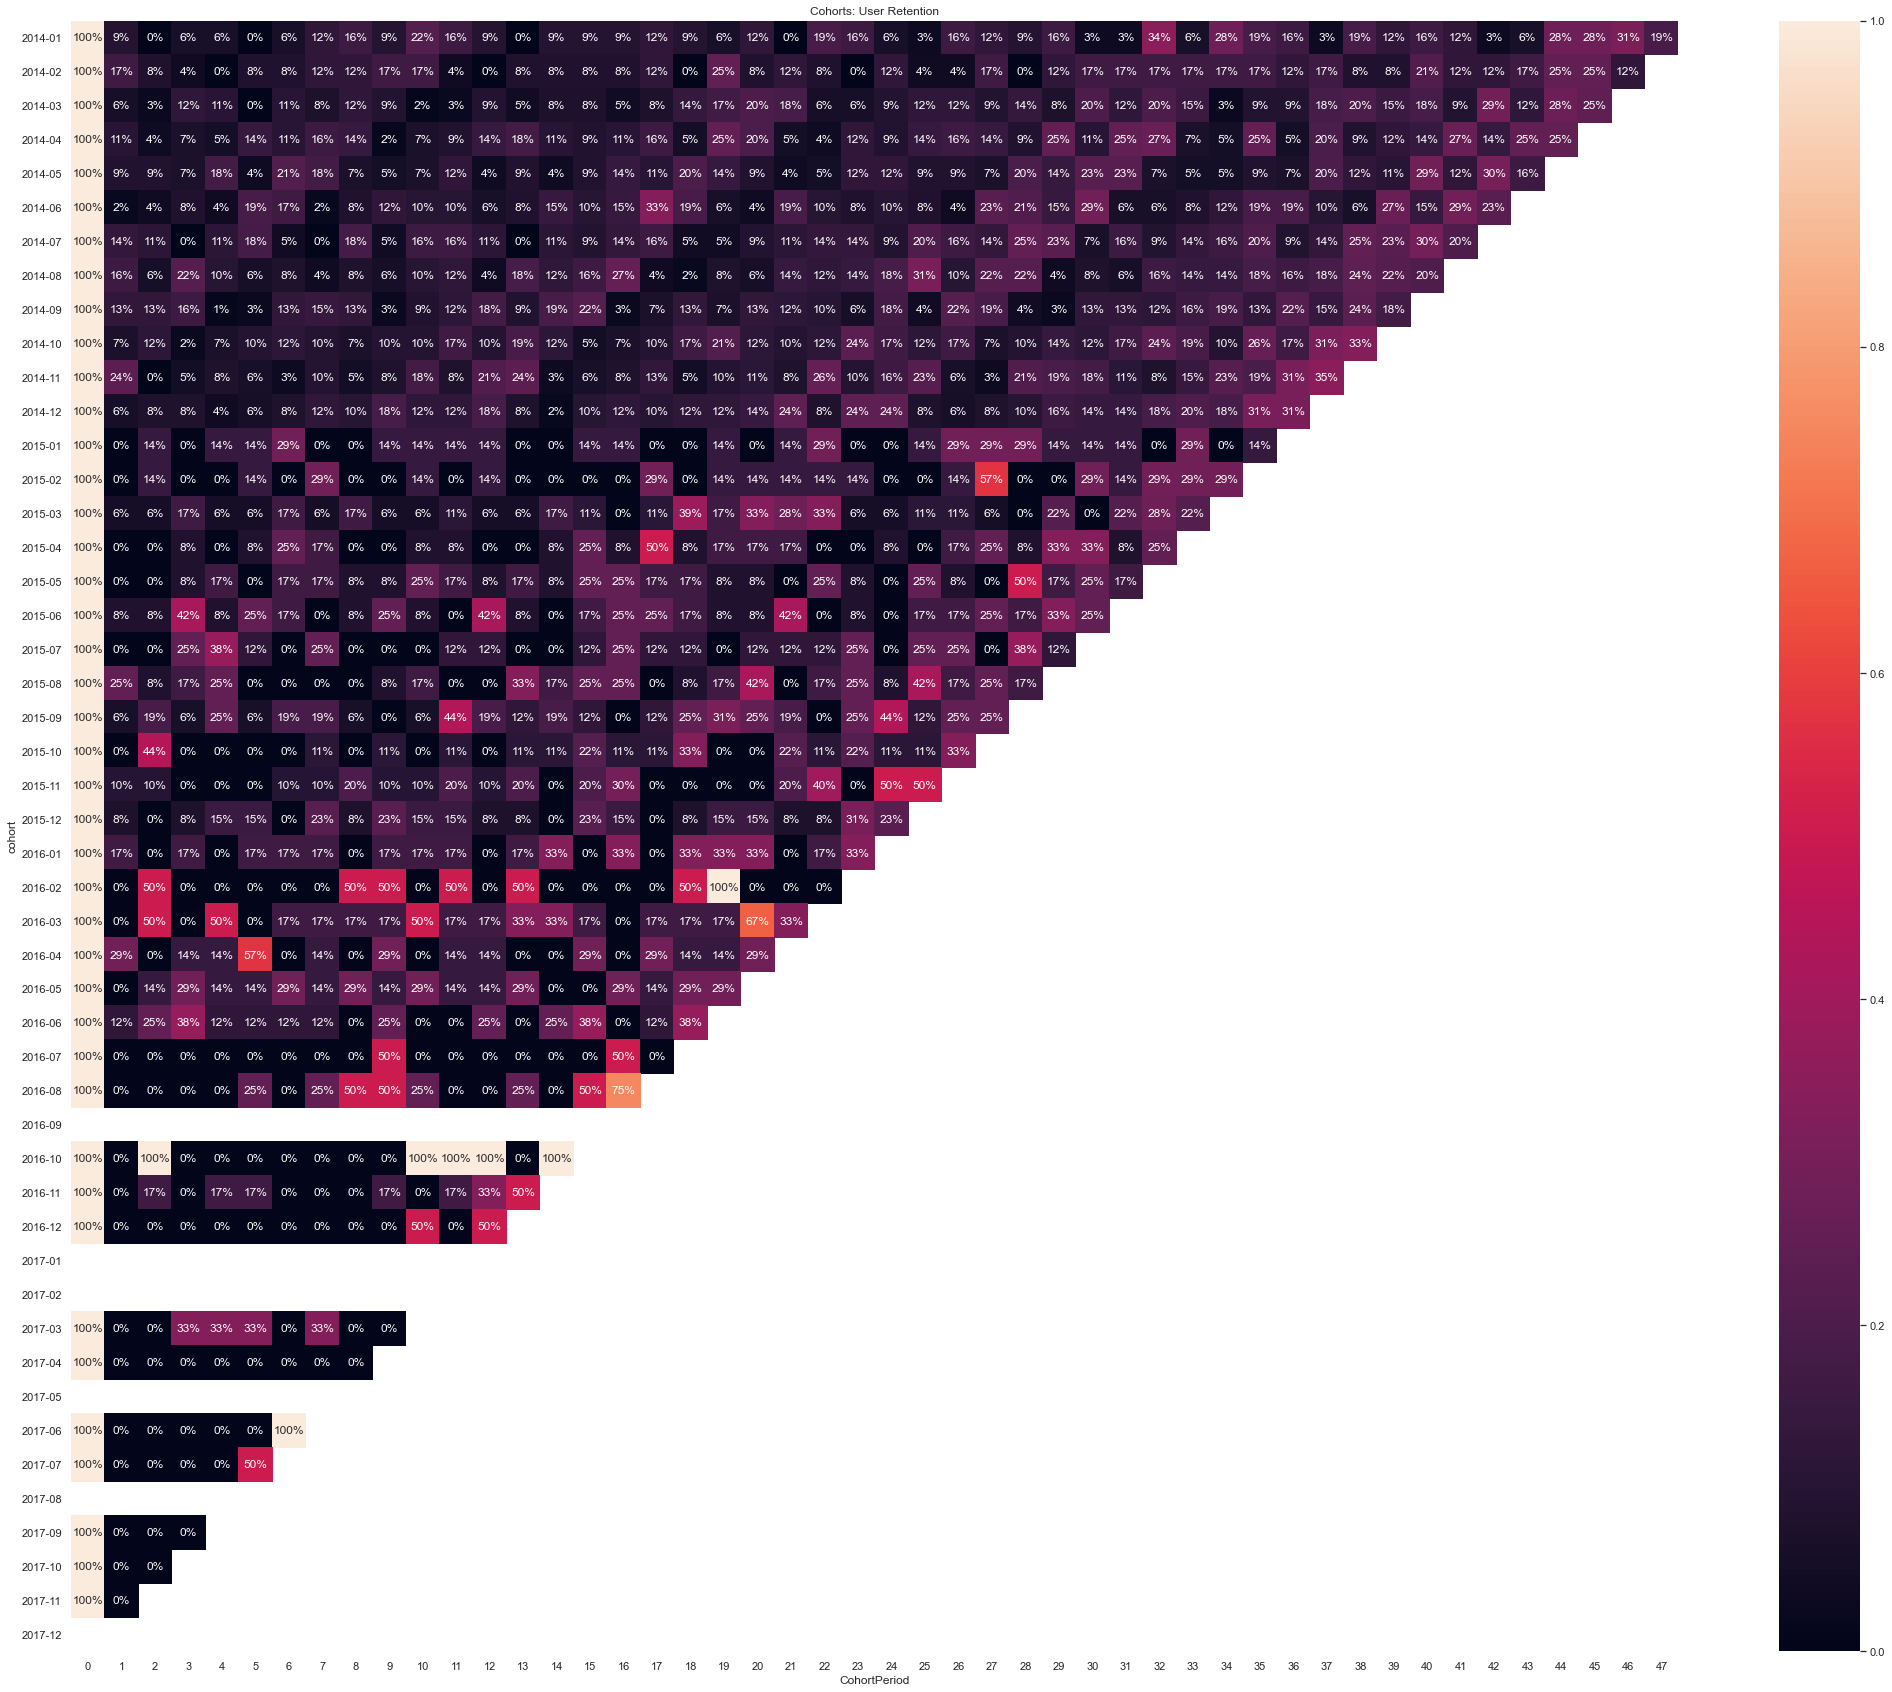

In [171]:
sns.set(style='white')
plt.figure(figsize=(36, 30))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

Если посмотреть на график для людей которые совершили первую покупку в 2014 и 2015 годах   
  
(на самом деле мы не знаем первая лли это так как данных за более ранний период у нас нет, но по таблице ниже можно предположить что это не их первые покупки, тогда для этих годов особенно для 2014 изменится)  
  
Тем не менее если сравнивать покупки 2016 и 2017 годов для когорт 2014 и 2015 годов видно что в 2017 году цвет более привлекательнее, мне кажется для сравнения можно было взять в качестве метрики сумму разностей retention за годовой период(т.е для когорты 2014-06 берем сумму разниц (2017-x - 2016-x)), так как видно что присутствует некая сезонность.

Стоило также посмотреть распределение пользователей по сшатам и городам, возможно действительно в некоторых местах существуют какаие то аномалии которые можно решать точечно



In [172]:
orders.groupby('cohort_year').count()

,id,order_date,ship_mode,customer_id,sales,Y-m_date,Y_date,cohort
cohort_year,,,,,,,,
2014,4020,4020,4020,4020,4020,4020,4020,4020
2015,739,739,739,739,739,739,739,739
2016,231,231,231,231,231,231,231,231
2017,19,19,19,19,19,19,19,19


за 2017 год удалось привлечь очень мало новых пользователей

(более чем в 10 раз меньше чем в прошлом году, который в смою очередь тоже мягко говоря не выдающийся в сравнении 2015 и 2014, если 2014 можно обьяснить более большой базой которую мы не видим из за данных, то 2015 обьяснить уже труднее, возможно наша услуга предоставляется достаточно редко, тогда разумно было увеличить когорту до 3-4 месяцев)

Это одна из причин почему трудно смотреть не утечку новых пользователей, очень мало данных, которые дают большой разброс

In [173]:
rev = orders.groupby('Y_date').sum().rename(columns = {'sales' : 'Выручка'})
rev

,id,Выручка
Y_date,,
2014,129838212,484247.4981
2015,139911008,470532.5090
2016,177945578,609205.5980
2017,226558668,733215.2552


In [174]:
count = orders.groupby('Y_date')[['sales']].count().rename(columns = {'sales' : 'Продаж за год'})
count

,Продаж за год
Y_date,
2014,969
2015,1038
2016,1315
2017,1687


In [175]:
avr = rev.join(count)
avr['avr_sales'] = avr['Выручка']/avr['Продаж за год']
avr

,id,Выручка,Продаж за год,avr_sales
Y_date,,,,
2014,129838212,484247.4981,969,499.739420
2015,139911008,470532.5090,1038,453.306849
2016,177945578,609205.5980,1315,463.274219
2017,226558668,733215.2552,1687,434.626707


Видно что количество продаж и выручка постоянно растут, при это средний чек падает.  
Учитывая что за последний год к нам добавилось несколько пользователей, которые совершили только 19 заказов, а при этом общее число заказов выросло на 372 (28%), можно сказать что наши пользователи наоборот увеличивают активность покупок.

В целом как мне кажется оценивать разницу сумм retention год к году хорошая идея, также следует следить за количеством покупок на одного пользователя на горизонте 1-2 года, также стоит посмотреть распределение по штатам, возможно есть какие то проблемы которые можно отследить если появилась гипотеза про проблему в доставке, ещё бы я спросил откуда такая гипотеза возникла.

И что то нужно делать с привлечением новых пользователей